# Бустинг

**Бустинг** — продвинутый метод построения ансамблей, где алгоритмы строятся итеративно, компенсируя ошибки предыдущих.

### КОГДА И ЦЕЛОГО ЛЕСА МАЛО

В прошлом модуле мы узнали об ансамблировании моделей. Одним из представителей такого подхода является случайный лес.

Случайный лес  — это композиция глубоких деревьев, которые строятся независимо друг от друга.

Такой подход имеет следующую проблему: обучение глубоких деревьев требует очень много вычислительных ресурсов, особенно в случае большой выборки или большого числа признаков.

Если ограничить глубину решающих деревьев в случайном лесе, то они уже не смогут улавливать сложные закономерности в данных. Это приведёт к тому, что сдвиг (bias) будет слишком большим.

### ПРИМЕР

Text(0.5, 1.0, 'Deep Random Forest')

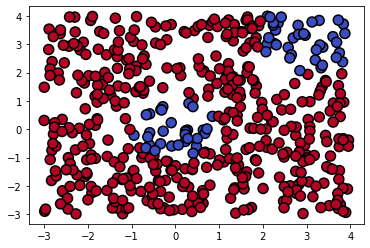

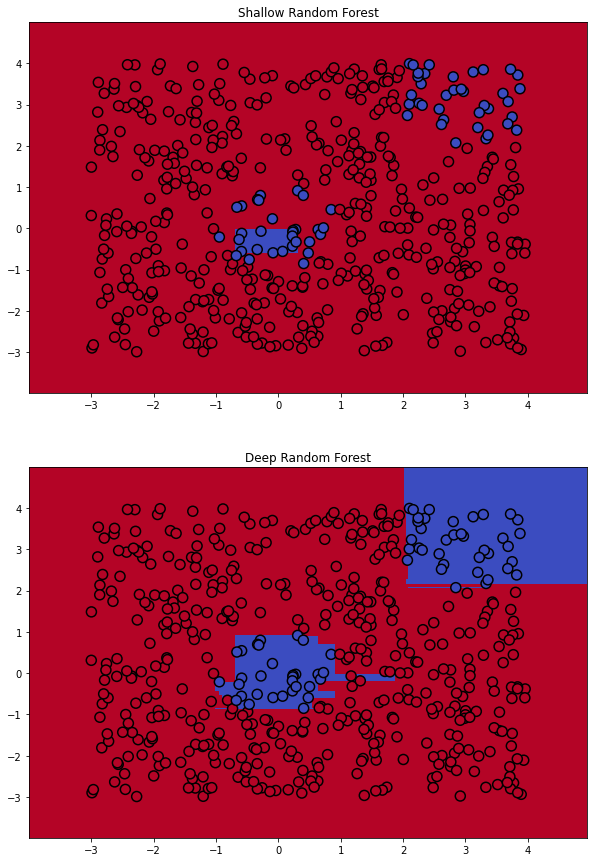

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

RANDOM_SEED = 139

def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=6, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);


fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

## AdaBoost

AdaBoost — итеративный алгоритм построения ансамбля. На каждой новой итерации строится дерево решений, корректирующее ответы всех предыдущих. Будем пробовать на каждой итерации разделить данные деревом глубины 1 (так называемым пнём). На первых двух итерациях мы увидим следующую картинку:

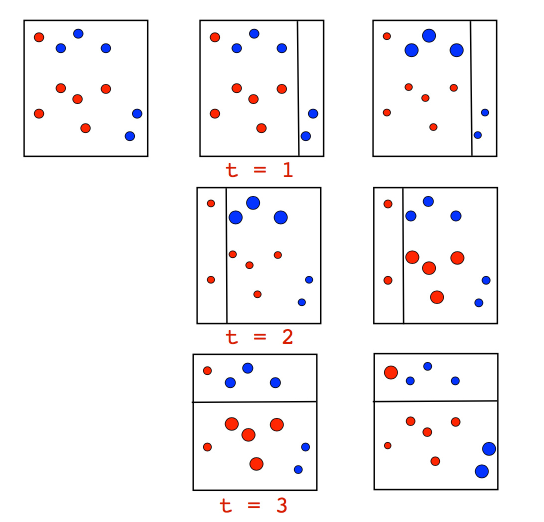

Размер точки соответствует полученному ей весу за ошибочное предсказание. Мы видим, как на каждой итерации эти веса растут — пни не могут в одиночку справиться с такой задачей. Однако, когда мы произведём взвешенное голосование ранее построенных пней, мы получим искомое нами разделение:

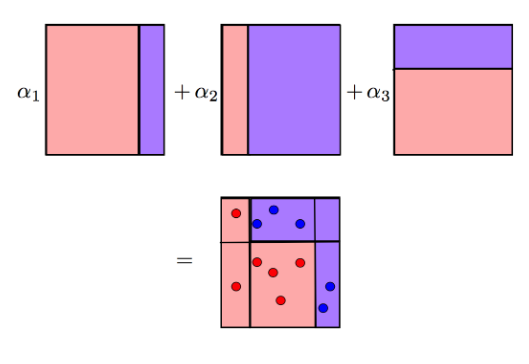

Первый ансамбль в этом разделе, который мы рассмотрим, называется AdaBoost (Adaptive Boosting). Бустинг позволяет из большого количества относительно слабых и простых моделей получить одну сильную. В нашем случае будут рассматриваться деревья решений ограниченной глубины.

## Градиентный бустинг

Теперь рассмотрим другой вид бустинга, точнее его обобщение. Со временем после создания AdaBoost исследователям удалось создать более полную модель бустинга, которая называется Gradient Boosting.

Принцип такой же, как в AdaBoost: каждый новый алгоритм улучшает композицию построенных ранее. Рассмотрим, как строится эта композиция.

## Бустинг. Практика

#### Задание 6.4.1

Для решения первого задания урока сначала подготовим данные. Выкачаем набор данных, в котором будет прогнозировать, является ли письмо спамом.

In [77]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')

df

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...,...
4596,4597,88,0.000,0.000,0.00,0.00,0.31,n
4597,4598,14,0.000,0.353,0.00,0.00,0.00,n
4598,4599,118,0.000,0.000,0.00,0.00,0.30,n
4599,4600,78,0.000,0.000,0.00,0.00,0.96,n


Из столбца yesno сделайте столбец spam, где 1 соответствует значению y (является спамом), а 0 – n (не является спамом). Удалите первый столбец (с индексом) и столбец "yesno".

In [78]:
df['spam'] = np.where(df['yesno'] == 'y', 1 ,0)
df = df.drop(columns=['yesno', 'Unnamed: 0'])

In [16]:
df

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0
4597,14,0.000,0.353,0.00,0.00,0.00,0
4598,118,0.000,0.000,0.00,0.00,0.30,0
4599,78,0.000,0.000,0.00,0.00,0.96,0


У Вас остается шесть столбцов-признаков и один столбец spam, который является нашей целевой переменной. Разделим их на x и у.

In [79]:
X = df.iloc[:,:-1]
y = df.loc[:, 'spam'] # target

In [18]:
X

,crl.tot,dollar,bang,money,n000,make
0,278,0.000,0.778,0.00,0.00,0.00
1,1028,0.180,0.372,0.43,0.43,0.21
2,2259,0.184,0.276,0.06,1.16,0.06
3,191,0.000,0.137,0.00,0.00,0.00
4,191,0.000,0.135,0.00,0.00,0.00
...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31
4597,14,0.000,0.353,0.00,0.00,0.00
4598,118,0.000,0.000,0.00,0.00,0.30
4599,78,0.000,0.000,0.00,0.00,0.96


Теперь мы хотим создать новые признаки путем попарного перемножения уже имеющихся друг на друга. Сколько получится признаков после преобразования (включая те шесть, которые были в исходных данных)?

1 + 2 + 3 + 4 + 5 + 6 +

6*5 + 6*4 + 6*3 + 6*2 + 6*1<br />
5*4 + 5*3 + 5*2 + 5*1<br />
4*3 + 4*2 + 4*1<br />
3*2 + 3*1<br />
2*1

Итого: 21

In [49]:
# Делаем один категориальный признак на основе нескольких

def make_conj(data, feature1, feature2):
    data[feature1 + '_' + feature2] = data[feature1].astype(float) + data[feature2].astype(float)
    return (data)

# применим
make_conj(df, 'n000', 'make')

,crl.tot,dollar,bang,money,n000,make,spam,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,crl.tot_make,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,1,278.000,278.778,278.00,278.00,278.00,0.778,0.000,0.000,0.000,0.778,0.778,0.778,0.00
1,1028,0.180,0.372,0.43,0.43,0.21,1,1028.180,1028.372,1028.43,1028.43,1028.21,0.552,0.610,0.610,0.390,0.802,0.802,0.582,0.64
2,2259,0.184,0.276,0.06,1.16,0.06,1,2259.184,2259.276,2259.06,2260.16,2259.06,0.460,0.244,1.344,0.244,0.336,1.436,0.336,1.22
3,191,0.000,0.137,0.00,0.00,0.00,1,191.000,191.137,191.00,191.00,191.00,0.137,0.000,0.000,0.000,0.137,0.137,0.137,0.00
4,191,0.000,0.135,0.00,0.00,0.00,1,191.000,191.135,191.00,191.00,191.00,0.135,0.000,0.000,0.000,0.135,0.135,0.135,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0,88.000,88.000,88.00,88.00,88.31,0.000,0.000,0.000,0.310,0.000,0.000,0.310,0.31
4597,14,0.000,0.353,0.00,0.00,0.00,0,14.000,14.353,14.00,14.00,14.00,0.353,0.000,0.000,0.000,0.353,0.353,0.353,0.00
4598,118,0.000,0.000,0.00,0.00,0.30,0,118.000,118.000,118.00,118.00,118.30,0.000,0.000,0.000,0.300,0.000,0.000,0.300,0.30
4599,78,0.000,0.000,0.00,0.00,0.96,0,78.000,78.000,78.00,78.00,78.96,0.000,0.000,0.000,0.960,0.000,0.000,0.960,0.96


Разделим получившися данные на обучающую и тестовую выборки в соотношение 80:20. Обучите модель GradientBoostingClassifier (из библиотеки sklearn) с параметрами по умолчанию (на момент создания урока это learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features=None).

Во всех методах, где присутствует случайность, укажите random_state=42.

Это будет наш baseline. Укажите точность на тестовой выборке (параметр score), округлив до третьего знака после точки-разделителя.

In [86]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_SEED)

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None)

clf.fit(X_train, y_train)

clf.predict(X_test)

clf.score(X_test, y_test)

0.8621064060803475

In [ ]:
df['spam']=df['yesno'].apply(lambda x: 1 if x =='y' else 0)

df.drop(['Unnamed: 0','yesno'], axis=1, inplace=True)

cols = ['crl.tot','dollar','bang','money','n000','make']

pf = PolynomialFeatures(2,include_bias=False)

poly_features = pf.fit_transform(df[cols])

new_cols = pf.get_feature_names(cols)

poly_features = pd.DataFrame(poly_features, columns = new_cols)

df.drop(cols,axis=1,inplace=True)

df = pd.concat([df,poly_features], axis=1)

X = df.drop(['spam'], axis=1)
y= df.spam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

gbc = GradientBoostingClassifier(random_state=RANDOM_SEED)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

accuracy_score_ = accuracy_score(y_pred, y_test)
precision_score_ = precision_score(y_pred, y_test)

temp1 = accuracy_score_
temp2 = precision_score_

task = "6.4.2"
print(f"Ответ к заданию {task}")
print(f"точность accuracy_score:= {round(temp1,3)}")
print(f"точность precision_score:= {round(temp2,3)}\n")

feat_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feat_importances.largest = feat_importances.nlargest(15)
feat_importances.largest.plot(kind='barh')

temp = feat_importances.largest.index[2]

task = "6.4.3"

print(f"Ответ к заданию {task}")
print(f"третий по важности признак := {temp}")

#### Задание 6.4.3

Воспользуйтесь методом feature_importances_. С его помощью вы можете оценить вклад каждого признака в обучение модели. Постройте столбчатую диаграмму, где по горизонтали указаны названия признаков, а по вертикали их важность. В ответе укажите третий по важности признак (без кавычек и пробелов).

In [81]:
clf.feature_importances_

array([0.13309242, 0.43522159, 0.34507762, 0.05714788, 0.02666876,
       0.00279173])

In [1]:
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), df.columns, rotation=90)# - не сортированные названия признаков
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90) #  сортированные названия признаков

NameError: name 'clf' is not defined

In [63]:
import sklearn
sklearn.__version__

'0.22.1'

#### Задание 6.4.4

Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод GridSearchCV. Ему на вход подается модель, список параметров и способ оценивания. При запуске метода fit модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становятся та, при которой значение метрики максимально.

Укажите в качестве estimator градиетный бустинг с параметрами по дефолту и random_state=42. В параметре scoring укажите 'accuracy', n_jobs=-1, cv=5.

Сетку параметров задайте такой:

In [83]:
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}

In [84]:
from sklearn.model_selection import GridSearchCV

In [87]:
grid = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [91]:
print("Наилучшее значение правильности перекрестной проверки: {:.3f}".format(
 grid.best_score_))

Наил знач правильности перекр проверки: 0.885


In [93]:
print("Наил знач правильности на тесте: {:.2f}".format(
 grid.score(X_test, y_test)))
print("Наил параметры: ", grid.best_params_)

Наил знач правильности на тесте: 0.86
Наил параметры:  {'learning_rate': 0.01, 'n_estimators': 1250}


In [94]:
print("Наил estimators: ", grid.best_estimator_)

Наил estimators:  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Задание 6.4.5

Подбор параметров — незаменимый инструмент при настройке моделей. Однако, если данных очень много, а модель сложная, то иногда имеет смысл ограничить количество параметров, которые вы хотите перебрать. Если модель с одним набором параметров обучается 30 минут, а вы хотите перебрать 10 таких наборов, то стоит приготовиться к пятичасовому ожиданию. Также стоит учитывать, что размер некоторых параметров влияет на время, потраченное на обучение моделей. Например, менее глубокие деревья учатся быстрее, чем глубокие.

При использовании GridSearchCV перебираются все возможные способы комбинации параметров. Сколько разных моделей (моделей градиентного бустинга с разными наборами параметров) обучилось в прошлом задании?

#### Задание 6.4.6

Теперь воспользуемся GridSearchCV для подбора максимальной глубины (max_depth). В качестве estimator используйте градиентный бустинг с раннеее подобранными параметрами и random_state=42. Переберите все значения max_depth от 5 до 15 включительно. В ответ запишите значение параметра, при котором точность максимальна.

In [96]:
param_grid = {'max_depth':[5, 10, 15]}

In [98]:
clf = GradientBoostingClassifier(random_state=RANDOM_SEED, learning_rate=0.01, n_estimators=1250, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None)

grid = GridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
print("Наил параметры: ", grid.best_params_)

Наил параметры:  {'max_depth': 5}


#### Задание 6.4.7

Может показаться, что, научившись запускать готовые функции из библиотек и настривать параметры, мы абсолютно готовы к работе. Однако на поле боя нас могут подстерегать еще опасности — legacy code, то есть код, написанный кем-то до вас. Может быть, его можно было бы и улучшить, но на нём уже столько всего надстроено, что переписывать всё практически невозможно.

А ещё часто будет возникать необходимость просто понять код коллеги или сделать code review (грубо говоря, это анализ кода на предмет ошибок и расхождения в стиле). Во всех этих ситуациях необходим навык быcтрого чтения кода.

Поэтому в качестве примера в этом задании мы предлагаем изучить код для реализации AdaBoost с нуля. Вам необходимо запустить эту функцию, но с дописанными строчками (вычисление ошибки и веса алгоритма) на всех признаках, получившихся после всех преобразований в предыдущем датасете (до разделения выборки на обучающую и тестовую). Параметр learning_rate возьмите равным 0.001, М = 10. В ответ запишите точность, округленную до трёх знаков после точки-разделителя.

За основу нужно взять следующий код:

In [99]:
def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        estimator_error = np.sum(sample_weight*(y_predict != y))/np.sum(sample_weight)
        
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate*np.log((1-estimator_error)/estimator_error)

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

Accuracy =  0.8098239513149316


### Стекинг

Стекинг (stacking) — агрегация ответов моделей машинного обучения при помощи ещё одной модели машинного обучения. Подход использует понятие базовых моделей, каждая из которых обучается независимо от остальных, и мета-модели, которая использует предсказания базовых моделей как признаки.

Правила стекинга:

Обучать мета-модели нужно на новых для базовых моделей данных. Так избегается data leak, появляющийся при оценке алгоритмов на обучающей выборке.<br />
Можно использовать подходы из кросс-валидации (разбиение по фолдам, бутстрап) для получения различных моделей..<br />
Лучше применять регрессоры для мета-моделей..<br />
Для старта лучше взять простую мета-модель, например, линейную регрессию. В случае классификации — для агрегации вероятности классов. Этот частный случай называют блендингом (blending)..<br />
Брать в качестве базовых моделей модели различной природы..<br />
Обучать модель не только на истинный таргет, но и на прокси таргет, например, на важный признак, который выявили во время исследования данных..<br />
Делать стекинг с большим количеством уровней при наличии достаточного количества данных, времени и усилий, что на практике редко.

Частным случаем стекинга является блендинг